**Import Libraries**

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

**Read the Data**

In [8]:
df1=pd.read_csv("Movie_collection_Independent.csv")
df2=pd.read_csv("Movie_collection_Target.csv")

Here, df1 is Independent Variable dataset and df2 is target Variable dataset.

**Explore Datasets.**

In [26]:
df1.shape

(506, 19)

* No. of rows - 506
* No. of columns - 19

In [9]:
df1.head(3)

,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,3D_available,Genre_Thriller,Genre_Drama,Genre_Comedy
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,1,1,0,0
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,0,0,0,1


In [11]:
df1.columns

Index(['Marketin_expense', 'Production_expense', 'Multiplex_coverage',
       'Budget', 'Movie_length', 'Lead_ Actor_Rating', 'Lead_Actress_rating',
       'Director_rating', 'Producer_rating', 'Critic_rating', 'Trailer_views',
       'Time_taken', 'Twitter_hastags', 'Avg_age_actors', 'Num_multiplex',
       '3D_available', 'Genre_Thriller', 'Genre_Drama', 'Genre_Comedy'],
      dtype='object')

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketin_expense     506 non-null    float64
 1   Production_expense   506 non-null    float64
 2   Multiplex_coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  Time_taken           506 non-null    float64
 12  Twitter_hastags      506 non-null    float64
 13  Avg_age_actors       506 non-null    int64  
 14  Num_multiplex        506 non-null    int64  
 15  3D_available         506 non-null    int

In [5]:
df1.isnull().sum()

Marketin_expense       0
Production_expense     0
Multiplex_coverage     0
Budget                 0
Movie_length           0
Lead_ Actor_Rating     0
Lead_Actress_rating    0
Director_rating        0
Producer_rating        0
Critic_rating          0
Trailer_views          0
Time_taken             0
Twitter_hastags        0
Avg_age_actors         0
Num_multiplex          0
3D_available           0
Genre_Thriller         0
Genre_Drama            0
Genre_Comedy           0
dtype: int64

In [12]:
df2.head(3)

,Collection
0,2.266667
1,2.106667
2,2.980000


In [13]:
df2.columns

Index(['Collection'], dtype='object')

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Collection  506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [15]:
df2.isnull().sum()

Collection    0
dtype: int64

**Preprocessing for model building**

In [78]:
df=pd.concat((df1,df2),axis=1)

In [79]:
df.columns

Index(['Marketin_expense', 'Production_expense', 'Multiplex_coverage',
       'Budget', 'Movie_length', 'Lead_ Actor_Rating', 'Lead_Actress_rating',
       'Director_rating', 'Producer_rating', 'Critic_rating', 'Trailer_views',
       'Time_taken', 'Twitter_hastags', 'Avg_age_actors', 'Num_multiplex',
       '3D_available', 'Genre_Thriller', 'Genre_Drama', 'Genre_Comedy',
       'Collection'],
      dtype='object')

In [80]:
df.head()

,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,3D_available,Genre_Thriller,Genre_Drama,Genre_Comedy,Collection
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,1,1,0,0,2.266667
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,0,0,1,0,2.106667
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,0,0,0,1,2.980000
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,1,0,1,0,2.893333
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,0,0,1,0,3.080000


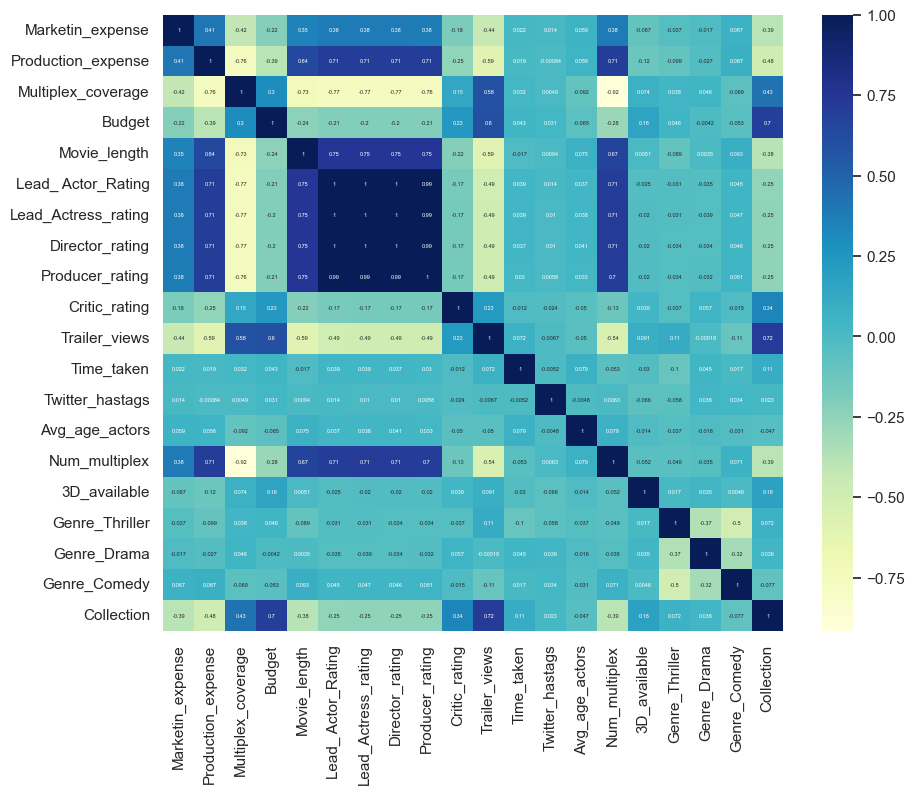

In [81]:
sns.set(rc = {'figure.figsize':(10,8)})
sns.heatmap(data=df.corr(numeric_only=True),cmap='YlGnBu',annot=True,annot_kws={'size':4},);

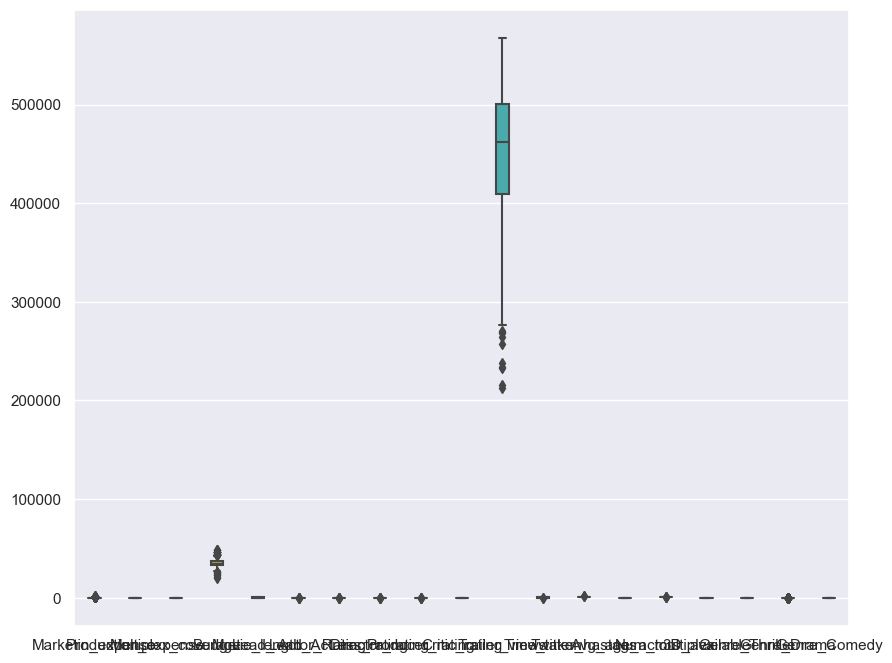

In [69]:
sns.boxplot(data=x,width=0.3);

In [70]:
#from above heat map we can say that Lead_actress_rating, director_rating and producer_rating forms colinearity. So we can drop these columns.
x = x.drop(['Lead_Actress_rating','Director_rating','Producer_rating','Trailer_views'],axis=1)

In [71]:
x.columns

Index(['Marketin_expense', 'Production_expense', 'Multiplex_coverage',
       'Budget', 'Movie_length', 'Lead_ Actor_Rating', 'Critic_rating',
       'Time_taken', 'Twitter_hastags', 'Avg_age_actors', 'Num_multiplex',
       '3D_available', 'Genre_Thriller', 'Genre_Drama', 'Genre_Comedy'],
      dtype='object')

Now we will split the data into training and testing data.

In [72]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=2459)

Here we have taken test_size as 20% and training size as 80%

Now we will build the model where we can predict the collection of a movie based on the features.

In [73]:
lr = LinearRegression()

In [74]:
lr.fit(x_train,y_train)

LinearRegression()

In [76]:
lr.score(x_test,y_test)

0.5943976366552772

In [77]:
lr.score(x_train,y_train)

0.6419367684059454

In [48]:
lr.predict(x_train)

array([[2.8569969 ],
       [1.86535617],
       [1.94316045],
       [2.37252459],
       [2.73418022],
       [2.27907658],
       [2.67915415],
       [1.51755204],
       [1.61232939],
       [2.30730917],
       [1.10734932],
       [2.52199593],
       [1.90737293],
       [2.39854916],
       [2.51397337],
       [3.01194726],
       [1.84684428],
       [1.30333703],
       [1.80845745],
       [2.53069299],
       [2.74586908],
       [1.82408456],
       [1.67749136],
       [1.68350885],
       [2.45896127],
       [2.27297611],
       [2.81840851],
       [1.96759585],
       [2.47118333],
       [2.41465922],
       [2.31866927],
       [1.76211379],
       [2.96879126],
       [2.47223129],
       [2.45478764],
       [1.74692027],
       [1.79815762],
       [2.08146434],
       [1.67360262],
       [1.98296593],
       [1.70669086],
       [2.81390246],
       [2.7946206 ],
       [2.15267681],
       [2.13473014],
       [2.52974122],
       [1.9625564 ],
       [2.536